<center>
## Schelling Segregation Model (SSM)
### Nicolò Tamagnone


Implementazione semplificata del modello di segregazione di Schelling (1971) 
[SSM](https://www.stat.berkeley.edu/~aldous/157/Papers/Schelling_Seg_Models.pdf).

Differentemente dal modello classico, non ho simulato su un lattice 2D, considerando come vicini i primi 8 bin rispetto al riferimento (Moore), ma ho calcolato direttamente le distanze fisiche dei punti considerando come vicini i "numerovicini" punti con distanza minore.

                        
                    


In [1]:
from random import seed, uniform
from math import sqrt
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Nic\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed', 'sqrt', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
num = 500        #numero totale di agenti per tipologia
numerovicini= 12 #numero di agenti che si considerano come vicini -- Moore neighborhood = 8 (lattice)
                 #                                                -- Von Neumann neighborhood = 4 (lattice)
vicinitipo = 8   #numero minimo di vicini simili per non spostarsi - threshold tollerance 
seed(10)

In [3]:
class Agente: 
    
    def __init__(self, type):
        self.type = type
        self.show_position()
    
    def show_position(self):
    #posizione casuale scelta da una distribuzione uniforme in un quadrato di area 1. 
        self.position= uniform(0,1), uniform(0,1)
    
    def distance(self, other):
    #distanza dall'agente in questione e gli altri, distanza euclidea 
        x1 = (self.position[0] - other.position[0])**2
        x2 = (self.position[1] - other.position[1])**2
        return sqrt(x1 + x2)
    
    def nomove(self, agents):
    #da True solo se è soffisfatta la soglia per numero di vicini dello stesso tipo
        distanze=[]
        for agent in agents:
            if self != agent:
                distanza = self.distance(agent)
                distanze.append((distanza, agent))
        distanze.sort()
        vicini = [agent for d, agent in distanze[:numerovicini]]
        numerostessotipo = sum(self.type == agent.type for agent in vicini)
        return numerostessotipo >= vicinitipo

    def update(self, agents):
        while not self.nomove(agents):
            self.show_position()  


In [4]:
def plot_distribuzione(agents, cicli):
    xa, ya = [],[]
    xb, yb = [],[]
    xc, yc = [],[]
    
    for agent in agents:
        x, y = agent.position
        if agent.type == "a":
            xa.append(x), ya.append(y)
        elif agent.type == "b":
            xb.append(x), yb.append(y)
        else:
            xc.append(x), yc.append(y)
    
    figura, ax = plt.subplots(figsize=(10,10))
    plot_args={'markersize':8, 'alpha':0.65, 'markersize':14}
    ax.set_axis_bgcolor('#ffffff')
    ax.plot(xa, ya, 'o', markerfacecolor='#ef10fd', **plot_args)
    ax.plot(xb, yb, 'o', markerfacecolor='#10fd50', **plot_args)
    ax.plot(xc, yc, 'D', markerfacecolor='#fd1010', **plot_args)
    ax.set_title('Iterazione {}'.format(cicli))
    plt.show()        

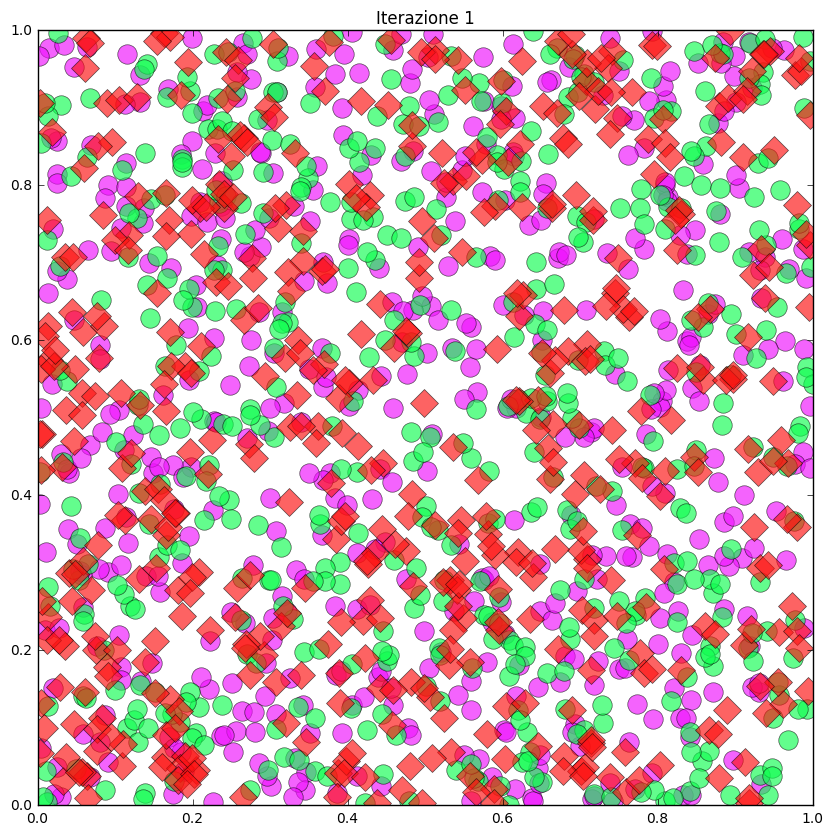

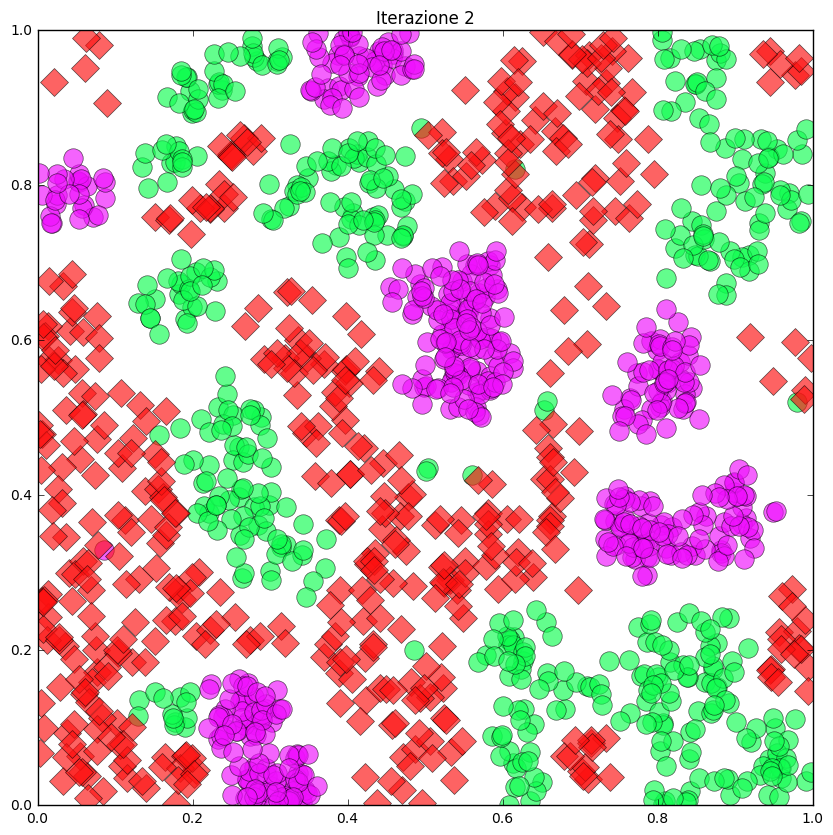

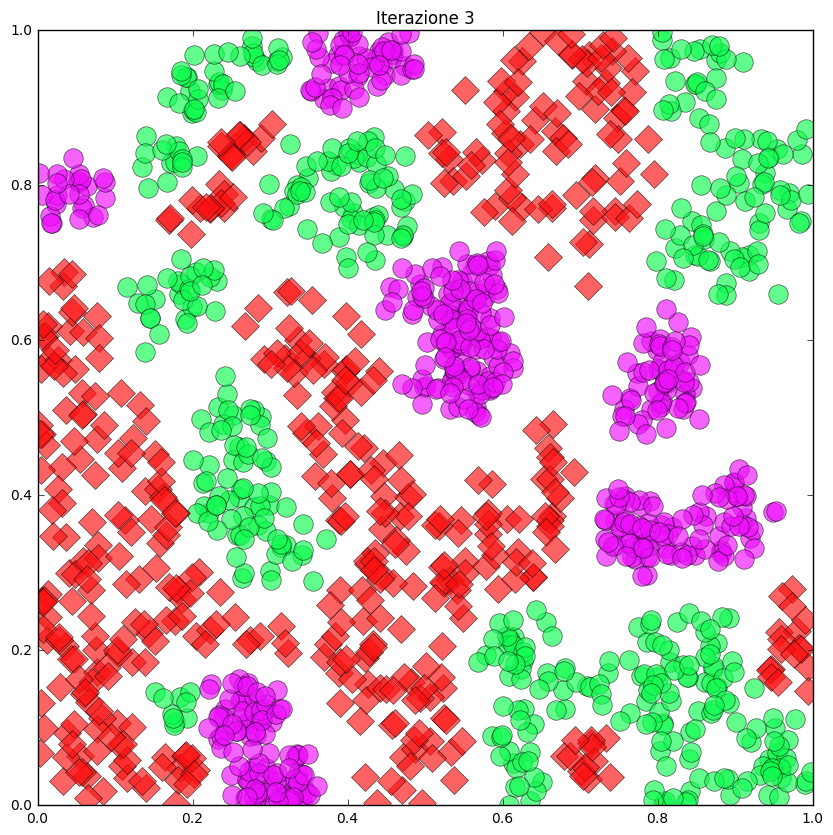

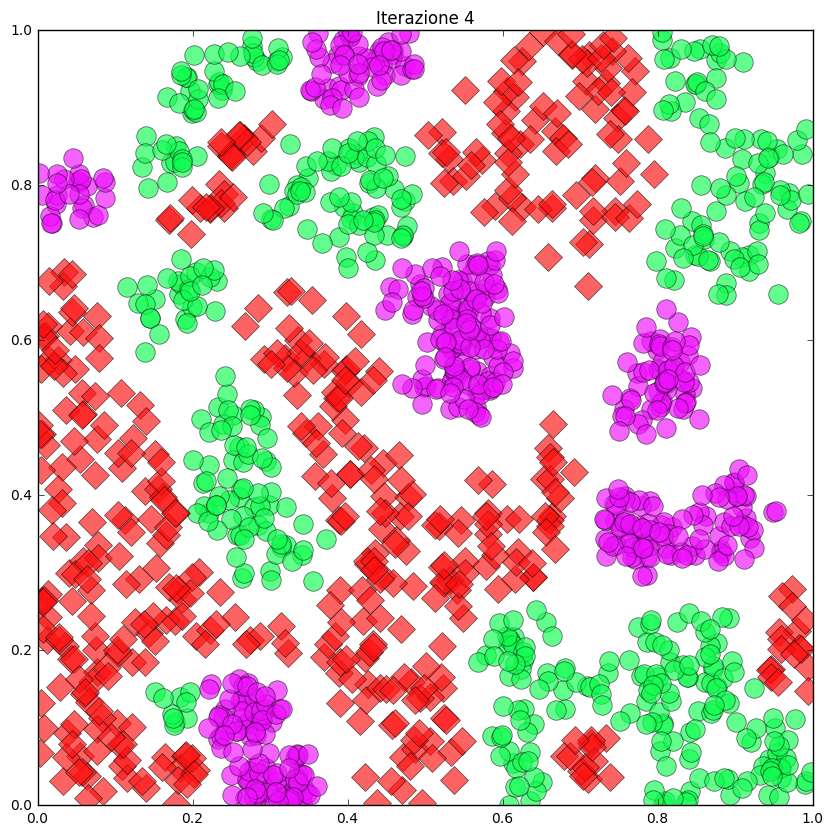

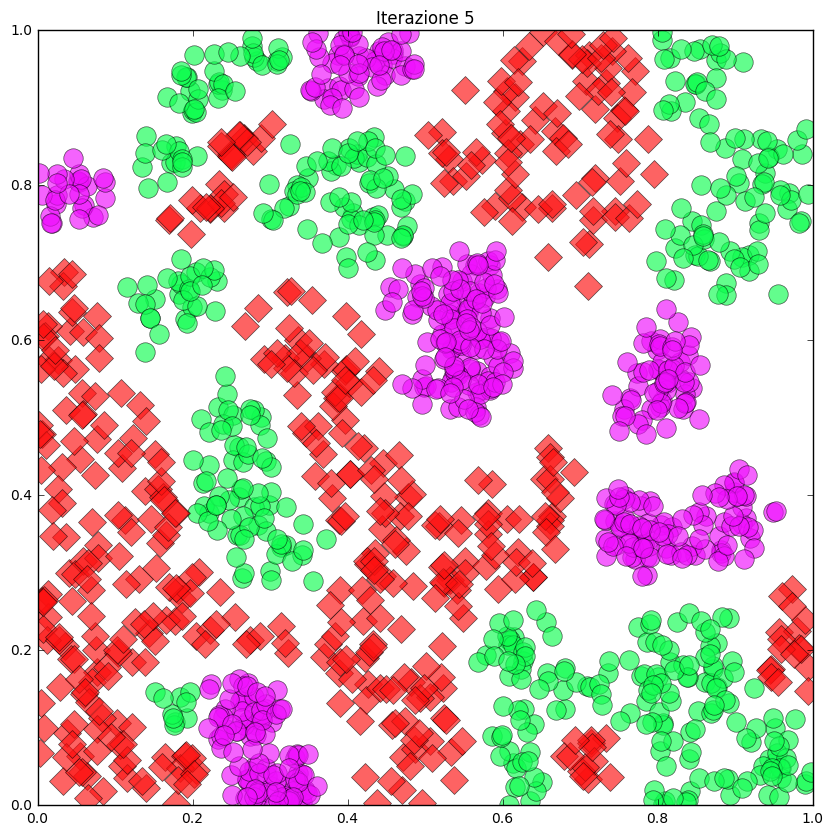

In [5]:
agents = [Agente("a") for i in range(num)]
agents.extend(Agente("b") for i in range(num))
agents.extend(Agente("c") for i in range(num))
cicli = 1
termine=False
while termine == False:
    plot_distribuzione(agents, cicli)
    cicli += 1
    nessunomosso = True
    for agent in agents:
        vecchiaposizione = agent.position
        agent.update(agents)
        if agent.position != vecchiaposizione:
            nessunomosso = False
    if nessunomosso:
        termine = True

        